In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection as ms


In [33]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target
x = cancer_data.data[:,:2]
#x = preprocessing.scale(x)


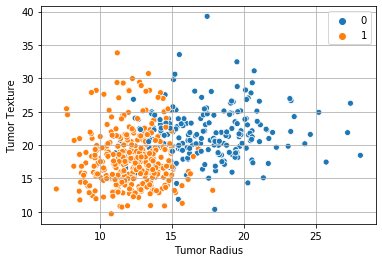

In [34]:
sns.scatterplot(x[:,0],x[:,1],hue=y)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()

In [35]:
alpha = np.arange(1e-15,1,0.005)
val_scores = np.zeros((len(alpha),1))
for i in range(len(alpha)):
    model = linear_model.SGDClassifier(loss="hinge",penalty="l2", alpha=alpha[i])
    score = ms.cross_val_score(model, x, y, cv=5)
    val_scores[i] = score.mean()


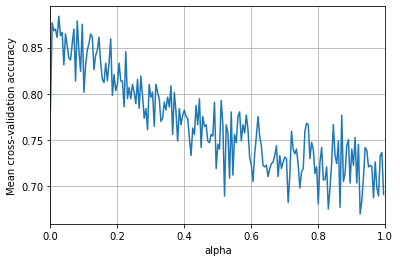

In [36]:
plt.plot(alpha,val_scores)
plt.xlim(0,1)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)
plt.show()

alpha star=  0.025000000000001


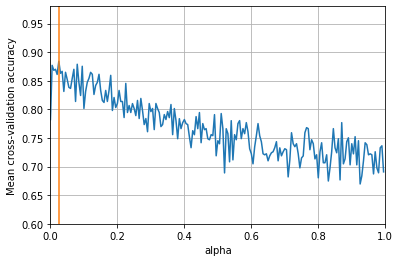

In [38]:
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('alpha star= ',alpha_star)
plt.plot(alpha,val_scores)
plt.plot(np.ones(11)*alpha_star,np.arange(0,1.1,0.1))
plt.xlim(0,1)
plt.ylim(0.60,0.98)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)
plt.show()


In [39]:
model_star = linear_model.SGDClassifier(loss="hinge",penalty="l2", alpha=alpha_star)
model_trained = model_star.fit(x,y)
print('Trainder accuracy= ',model_trained.score(x,y))


Trainder accuracy=  0.8523725834797891


In [40]:
print(np.shape(model_trained.coef_))

(1, 2)


In [41]:
print(model_trained.intercept_)
print(model_trained.coef_)

[13.18742555]
[[-0.74893736 -0.15468362]]


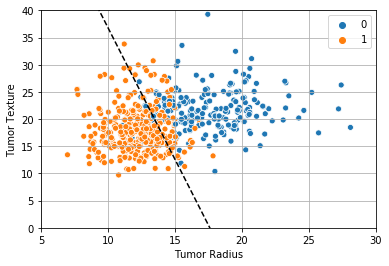

In [43]:
#slope = model_trained.coef_[0,1]/-model_trained.coef_[0,0]
x1 = np.arange(0,30,0.5)
x2 = (-model_trained.coef_[0,0]*x1 - model_trained.intercept_) / model_trained.coef_[0,1]
#y1 = slope * x1 + model_trained.intercept_
sns.scatterplot(x[:,0],x[:,1],hue=y)
plt.plot(x1,x2,'--k')
plt.xlim(5,30)
plt.ylim(0,40)
plt.xlabel('Tumor Radius')
plt.ylabel('Tumor Texture')
plt.grid(True)
plt.show()
